In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

2024-10-29 16:07:47.083932: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-29 16:07:47.085531: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-29 16:07:47.094379: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-29 16:07:47.109486: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730185667.137058    8447 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730185667.14

In [2]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/home/kjj37/venv/machine_learning/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
W0000 00:00:1730185671.573291    8447 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │       785,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 795,010 (3.03 MB)

 Trainable params: 795,010 (3.03 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
import time

start_time = time.time()
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                 epochs=10, batch_size=100, verbose=1)

print('Fit time : ', time.time() - start_time)

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.8876 - loss: 0.3903 - val_accuracy: 0.9658 - val_loss: 0.1102
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.9714 - loss: 0.0916 - val_accuracy: 0.9765 - val_loss: 0.0765
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.9840 - loss: 0.0522 - val_accuracy: 0.9757 - val_loss: 0.0751
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.9886 - loss: 0.0369 - val_accuracy: 0.9808 - val_loss: 0.0606
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9942 - loss: 0.0225 - val_accuracy: 0.9805 - val_loss: 0.0599
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9952 - loss: 0.0173 - val_accuracy: 0.9802 - val_loss: 0.0646
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9963 - loss: 0.0135 - val_accuracy: 0.9810 - val_loss: 0.0664
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9974 - loss: 0.0099 - va

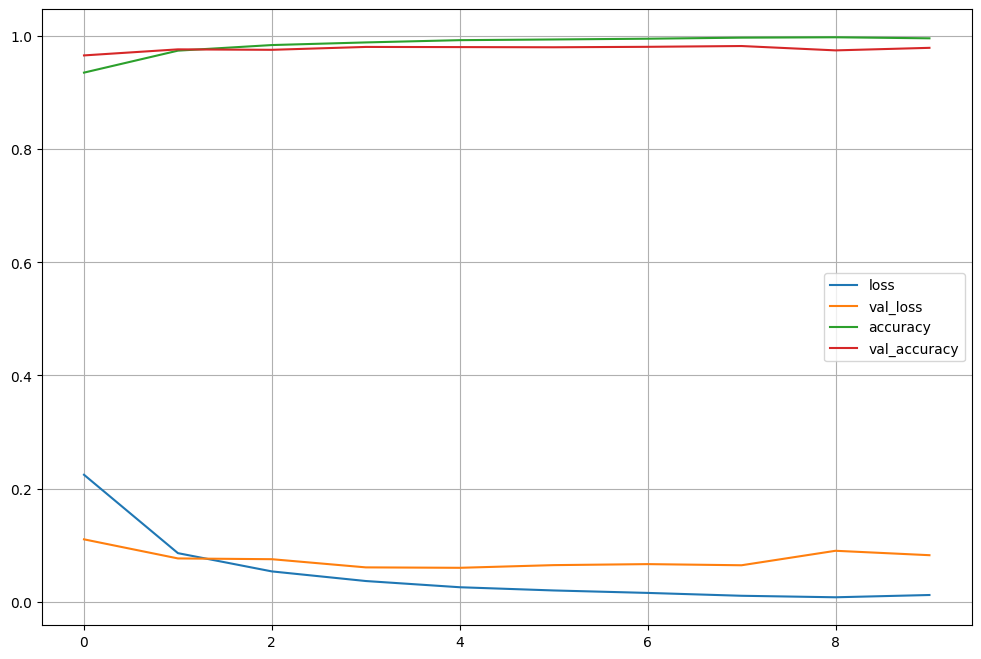

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [6]:
score = model.evaluate(X_test, y_test)
print('Test loss : ', score[0])
print('Test accuracy : ', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9748 - loss: 0.1033
Test loss :  0.08218042552471161
Test accuracy :  0.979200005531311


In [7]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [8]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [9]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

208

In [10]:
import random

samples = random.choices(population=wrong_result, k=16)
samples

[810,
 1378,
 1003,
 2447,
 2648,
 4123,
 2291,
 6571,
 4567,
 1014,
 6651,
 6755,
 6783,
 3559,
 2004,
 3520]

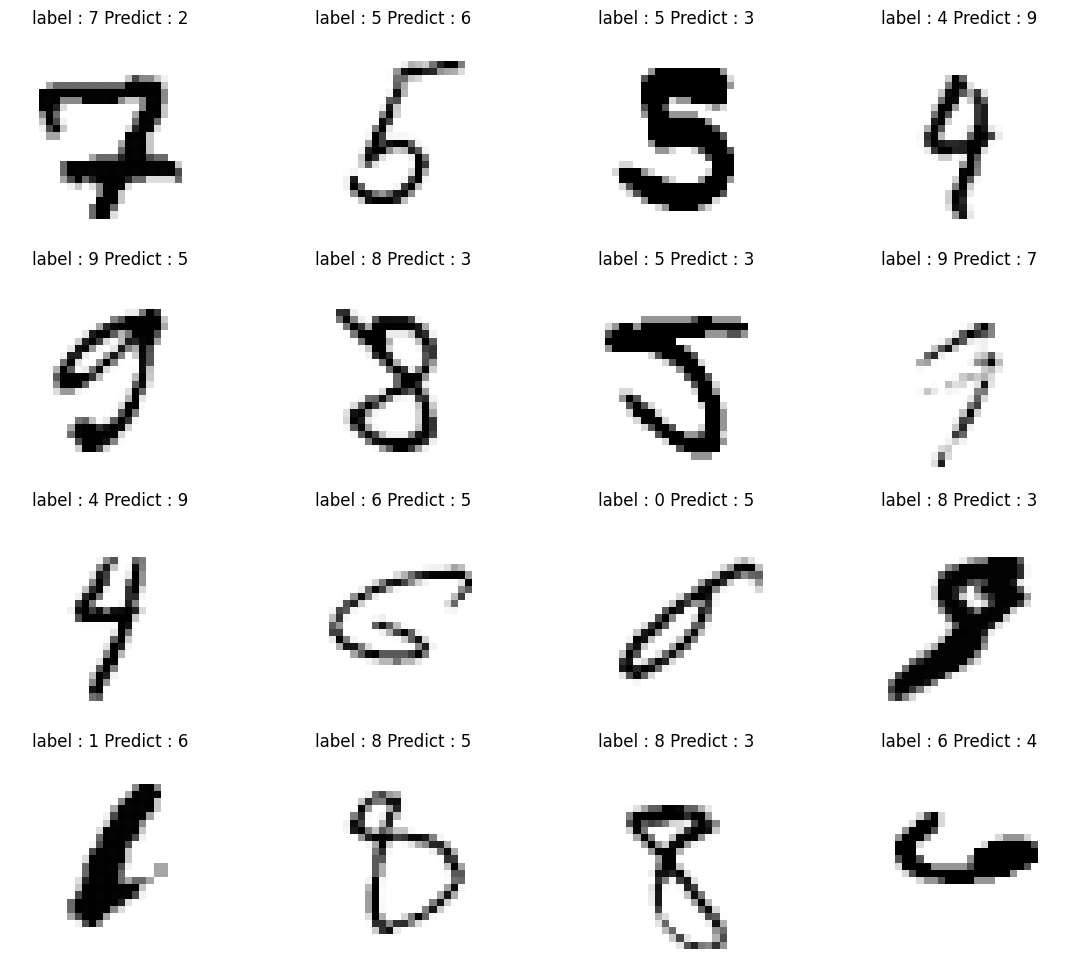

In [11]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('label : ' + str(y_test[n]) + ' Predict : ' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()